In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
list_stopwords = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
file_list = ["FearData.csv", 'SadData.csv', 'LoveData.csv', 'JoyData.csv', "AngerData.csv"]
emotion = ['fear', 'sadness', 'love', 'happy', 'anger']

for i, j in zip(file_list, emotion):
    df_temp = pd.read_csv(i, sep="\t")
    df_temp = df_temp[["Label", "Tweet"]]
    df_temp = df_temp.rename(columns={"Label": 'label', 'Tweet': 'tweet'})
    df_temp["label"] = j
    df = pd.concat([df, df_temp], ignore_index=True)

In [12]:
df.shape

(9480, 2)

In [9]:
df = pd.read_csv("Twitter_Emotion_Dataset.csv")

In [5]:
df.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [13]:
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [14]:
df.duplicated().sum()

54

In [15]:
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

0

In [32]:
df.shape

(9426, 2)

In [16]:
df['label'].value_counts()

label
happy      2270
anger      2223
sadness    1991
fear       1552
love       1390
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

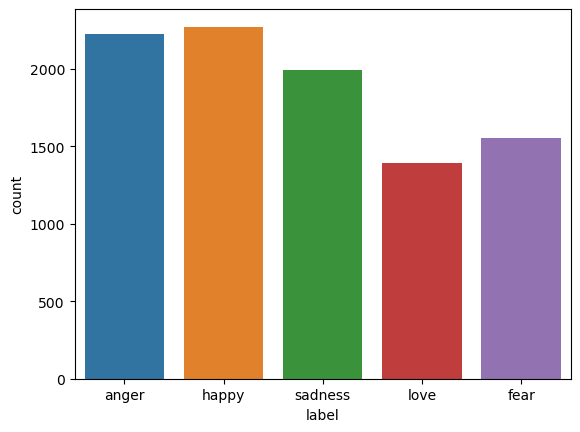

In [34]:
sns.countplot(df, x='label')

In [35]:
df["label"] = df["label"].replace(['anger', 'happy', 'sadness', 'love', 'fear'], [0,1,2,3,4])

In [62]:
df.head()

,label,stemmed
0,0,jalan jatibarupolisi tidak bisa gertak gubernu...
1,0,cewek lho kayak rasain sibuk jaga rasain sakit...
2,1,kepingin gudeg mbarek bu hj amad foto google s...
3,0,jalan jatibarubagian wilayah tn abangpengatura...
4,1,sharing alam saja kemarin jam batalin tiket st...


In [37]:
values = df['label'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100
percentage_2 = (values[2] /total) * 100
percentage_3 = (values[3]/ total) *100
percentage_4 = (values[4] /total) * 100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)
print('percentage of 2 :' ,percentage_2)
print('percentage of 3 :' ,percentage_3)
print('percentage of 4 :' ,percentage_4)

percentage of 0 : 23.583704646721834
percentage of 1 : 24.082325482707407
percentage of 2 : 21.122427328665395
percentage of 3 : 14.746446000424356
percentage of 4 : 16.46509654148101


In [38]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'\d+', '', text)
    
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [39]:
df["full_text"] = df["tweet"].apply(clean_text)

df["full_text"] = df["full_text"].str.lower()

In [40]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['full_text'].apply(tokenize)
df.head()

,label,tweet,full_text,tokenize
0,0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",soal jln jatibarupolisi tdk bs gertak gubernur...,"[soal, jln, jatibarupolisi, tdk, bs, gertak, g..."
1,0,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ..."
2,1,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ..."
3,0,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jln jatibarubagian dari wilayah tn abangpengat...,"[jln, jatibarubagian, dari, wilayah, tn, abang..."
4,1,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing pengalaman aja kemarin jam batalin tik...,"[sharing, pengalaman, aja, kemarin, jam, batal..."


In [41]:
def stopwords_removal(text):
    return [word for word in text if word not in list_stopwords]

In [42]:
df["removed_stopwords"] = df["tokenize"].apply(lambda x: stopwords_removal(x))
df.head()

,label,tweet,full_text,tokenize,removed_stopwords
0,0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",soal jln jatibarupolisi tdk bs gertak gubernur...,"[soal, jln, jatibarupolisi, tdk, bs, gertak, g...","[jln, jatibarupolisi, tdk, bs, gertak, gubernu..."
1,0,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[cewe, lho, kayaknya, rasain, sibuk, jaga, ras..."
2,1,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[kepingin, gudeg, mbarek, bu, hj, amad, foto, ..."
3,0,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jln jatibarubagian dari wilayah tn abangpengat...,"[jln, jatibarubagian, dari, wilayah, tn, abang...","[jln, jatibarubagian, wilayah, tn, abangpengat..."
4,1,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing pengalaman aja kemarin jam batalin tik...,"[sharing, pengalaman, aja, kemarin, jam, batal...","[sharing, pengalaman, aja, kemarin, jam, batal..."


In [43]:
singkatan = pd.read_csv("kamus_singkatan.csv", header=None, sep=';')

In [44]:
singkatan = singkatan.rename(columns={0: 'singkatan', 1: 'kata'})

In [45]:
singkatan.head()

,singkatan,kata
0,aamiin,amin
1,adek,adik
2,adlh,adalah
3,aer,air
4,aiskrim,es krim


In [46]:
singkatan_dict = singkatan.set_index('singkatan')['kata'].to_dict()

In [47]:
singkatan_dict

{'aamiin': 'amin ',
 'adek': 'adik ',
 'adlh': 'adalah ',
 'aer': 'air ',
 'aiskrim': 'es krim ',
 'aj': 'saja ',
 'aja': 'saja ',
 'ajah': 'saja ',
 'ajalah': 'saja ',
 'aje': 'saja ',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya ',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan ',
 'ama': 'sama ',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur ',
 'ane': 'saya ',
 'anget': 'hangat ',
 'anjeng': 'anjing ',
 'ank': 'anak ',
 'apah': 'apa ',
 'aph': 'apa',
 'apo': 'apa ',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya ',
 'asek': 'asik ',
 'ati2': 'hati-hati ',
 'atit': 'sakit ',
 'atu': 'satu ',
 'atw': 'atau ',
 'ayang': 'sayang ',
 'ayuk': 'ayo ',
 'babang': 'abang',
 'bae': 'baik ',
 'bais': 'habis',
 'bakalan': 'akan ',
 'bales': 'balas ',
 'bandingin': 'bandingkan ',
 'banget': 'sekali ',
 'bangett': 'sangat ',
 'banyakin': 'perbanyak ',
 'barengan': 'bersamaan ',
 'baryaw': 'sabar ya',
 'baso': 'bakso ',
 'bay': 'selamat tinggal

In [48]:
def replace_abbreviations(text):
    return [singkatan_dict[word] if word in singkatan_dict else word for word in text]

In [49]:
df['baku'] = df['removed_stopwords'].apply(lambda x: replace_abbreviations(x))

In [50]:
df.head(10)

,label,tweet,full_text,tokenize,removed_stopwords,baku
0,0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",soal jln jatibarupolisi tdk bs gertak gubernur...,"[soal, jln, jatibarupolisi, tdk, bs, gertak, g...","[jln, jatibarupolisi, tdk, bs, gertak, gubernu...","[jalan , jatibarupolisi, tidak, bisa, gertak, ..."
1,0,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[cewe, lho, kayaknya, rasain, sibuk, jaga, ras...","[cewek , lho, kayaknya, rasain, sibuk, jaga, r..."
2,1,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[kepingin, gudeg, mbarek, bu, hj, amad, foto, ..."
3,0,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jln jatibarubagian dari wilayah tn abangpengat...,"[jln, jatibarubagian, dari, wilayah, tn, abang...","[jln, jatibarubagian, wilayah, tn, abangpengat...","[jalan , jatibarubagian, wilayah, tn, abangpen..."
4,1,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing pengalaman aja kemarin jam batalin tik...,"[sharing, pengalaman, aja, kemarin, jam, batal...","[sharing, pengalaman, aja, kemarin, jam, batal...","[sharing, pengalaman, saja , kemarin, jam, bat..."
5,0,"Dari sekian banyak thread yang aku baca, threa...",dari sekian banyak thread yang aku baca thread...,"[dari, sekian, banyak, thread, yang, aku, baca...","[sekian, thread, baca, thread, aneh, sih, penu...","[sekian, thread, baca, thread, aneh, sih, penu..."
6,1,Sharing sama temen tuh emg guna bgt. Disaat lu...,sharing sama temen tuh emg guna bgt disaat lu ...,"[sharing, sama, temen, tuh, emg, guna, bgt, di...","[sharing, temen, tuh, emg, bgt, disaat, lu, ng...","[sharing, teman , tuh, memang, sangat , disaat..."
7,2,Orang lain kalau pake ponco itu buat jas hujan...,orang lain kalau pake ponco itu buat jas hujan...,"[orang, lain, kalau, pake, ponco, itu, buat, j...","[orang, pake, ponco, jas, hujan, pake, kasur, ...","[orang, pakai , ponco, jas, hujan, pakai , kas..."
8,0,"Contoh mereka yg gemar menyudutkan, teriak pal...",contoh mereka yg gemar menyudutkan teriak pali...,"[contoh, mereka, yg, gemar, menyudutkan, teria...","[contoh, yg, gemar, menyudutkan, teriak, toler...","[contoh, yang , gemar, menyudutkan, teriak, to..."
9,2,Pulang udah H-4 lebaran dilema sekali. Seperti...,pulang udah h lebaran dilema sekali seperti ti...,"[pulang, udah, h, lebaran, dilema, sekali, sep...","[pulang, udah, h, lebaran, dilema, dirumah, le...","[pulang, sudah, h, lebaran, dilema, dirumah, l..."


In [51]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [52]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

In [53]:
df["stemmed"] = df['baku'].apply(lambda x: ' '.join(stemming(x)))
df.head()

,label,tweet,full_text,tokenize,removed_stopwords,baku,stemmed
0,0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",soal jln jatibarupolisi tdk bs gertak gubernur...,"[soal, jln, jatibarupolisi, tdk, bs, gertak, g...","[jln, jatibarupolisi, tdk, bs, gertak, gubernu...","[jalan , jatibarupolisi, tidak, bisa, gertak, ...",jalan jatibarupolisi tidak bisa gertak gubernu...
1,0,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[cewe, lho, kayaknya, rasain, sibuk, jaga, ras...","[cewek , lho, kayaknya, rasain, sibuk, jaga, r...",cewek lho kayak rasain sibuk jaga rasain sakit...
2,1,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...",kepingin gudeg mbarek bu hj amad foto google s...
3,0,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jln jatibarubagian dari wilayah tn abangpengat...,"[jln, jatibarubagian, dari, wilayah, tn, abang...","[jln, jatibarubagian, wilayah, tn, abangpengat...","[jalan , jatibarubagian, wilayah, tn, abangpen...",jalan jatibarubagian wilayah tn abangpengatura...
4,1,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing pengalaman aja kemarin jam batalin tik...,"[sharing, pengalaman, aja, kemarin, jam, batal...","[sharing, pengalaman, aja, kemarin, jam, batal...","[sharing, pengalaman, saja , kemarin, jam, bat...",sharing alam saja kemarin jam batalin tiket st...


In [54]:
df.drop(columns=['tweet', 'full_text', 'tokenize', 'removed_stopwords', 'baku'], inplace=True)

In [64]:
df.head()

,label,stemmed
0,0,jalan jatibarupolisi tidak bisa gertak gubernu...
1,0,cewek lho kayak rasain sibuk jaga rasain sakit...
2,1,kepingin gudeg mbarek bu hj amad foto google s...
3,0,jalan jatibarubagian wilayah tn abangpengatura...
4,1,sharing alam saja kemarin jam batalin tiket st...


In [65]:
df.isnull().sum()

label      0
stemmed    0
dtype: int64

In [66]:
df.to_csv("final2.csv", index=False)

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(max_features=5000)

In [58]:
X = tfid.fit_transform(df['stemmed'])
y = df['label']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 32)

In [60]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [61]:
svc = SVC()
svc.fit(X_train, y_train)

regression = LogisticRegression()
regression.fit(X_train, y_train)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

y_predSVC = svc.predict(X_test)
y_predLR = regression.predict(X_test)
y_predRFC = forest.predict(X_test)

print("Support Vector Machine")
print(classification_report(y_test, y_predSVC))
print(confusion_matrix(y_test, y_predSVC))

print('\n')
print("Logistic Regression")
print(classification_report(y_test, y_predLR))
print(confusion_matrix(y_test, y_predLR))

print('\n')
print("Random Forest")
print(classification_report(y_test, y_predRFC))
print(confusion_matrix(y_test, y_predRFC))


C:\Users\Darren\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Support Vector Machine
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       677
           1       0.71      0.70      0.71       683
           2       0.69      0.63      0.66       591
           3       0.74      0.76      0.75       408
           4       0.86      0.71      0.78       469

    accuracy                           0.73      2828
   macro avg       0.74      0.73      0.73      2828
weighted avg       0.73      0.73      0.73      2828

[[566  38  32  25  16]
 [ 77 481  59  44  22]
 [101  88 372  23   7]
 [ 20  40  31 310   7]
 [ 53  27  42  15 332]]


Logistic Regression
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       677
           1       0.72      0.71      0.72       683
           2       0.70      0.65      0.67       591
           3       0.76      0.77      0.76       408
           4       0.86      0.75      0.80       469

    accuracy            

In [119]:
inputtext = "takut banget serem besok gw ujian matematika"
inputtext = clean_text(inputtext)
inputtext = inputtext.lower()
inputtext = tokenize(inputtext)
inputtext = stopwords_removal(inputtext)
inputtext = replace_abbreviations(inputtext)
inputtext = ' '.join(stemming(inputtext))

In [120]:
inputtext

'takut sekali seram besok saya uji matematika'

In [121]:
vector_input = tfid.transform([inputtext])
result = svc.predict(vector_input)[0]
result

4